# Criptomonedas vs Indices Bursátiles

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mpl_dates
import pandas as pd
from sklearn import preprocessing


In [55]:
btc = pd.read_csv('csv_Bitcoin_data.csv')
eth = pd.read_csv('csv_Ethereum_data.csv')
ltc = pd.read_csv('csv_Litecoin_data.csv')
HangSeng = pd.read_csv('csv_HangSeng_data.csv')
Nikkei = pd.read_csv('csv_Nikkei225_data.csv')
SandP = pd.read_csv('csv_S&P500_data.csv')
EuroNext = pd.read_csv('csv_Euronext100_data.csv')


In [56]:
#Checamos el formato en el que están los datos
btc.head(3) 

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-04,3832.04,3865.93,3783.85,3857.72,3857.72,4.847965e+09
1,2019-01-07,4078.58,4092.61,4020.89,4025.25,4025.25,5.228626e+09
2,2019-01-08,4028.47,4109.02,3996.96,4030.85,4030.85,5.306593e+09


In [57]:
SandP.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-04,2474.33,2538.07,2474.33,2531.94,2531.94,4.213410e+09
1,2019-01-07,2535.61,2566.16,2524.56,2549.69,2549.69,4.104710e+09
2,2019-01-08,2568.11,2579.82,2547.56,2574.41,2574.41,4.083030e+09


In [58]:
#A Date, le damos formato fecha para cada DB
btc['Date'] = pd.to_datetime(btc["Date"])
ltc['Date'] = pd.to_datetime(ltc["Date"])
eth['Date'] = pd.to_datetime(eth["Date"])
HangSeng['Date'] = pd.to_datetime(HangSeng["Date"])
Nikkei['Date'] = pd.to_datetime(Nikkei["Date"])
SandP['Date'] = pd.to_datetime(SandP["Date"])
EuroNext['Date'] = pd.to_datetime(EuroNext["Date"])

In [59]:
#Queremos que el índice sea la fecha
btc = btc.set_index("Date")
ltc = ltc.set_index("Date")
eth = eth.set_index("Date")
HangSeng = HangSeng.set_index("Date")
Nikkei = Nikkei.set_index("Date")
SandP = SandP.set_index("Date")
EuroNext = EuroNext.set_index("Date")


# Análisis de Bitcoin

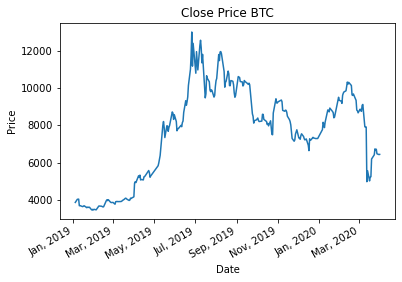

In [60]:
plt.plot(btc["Close"]);
plt.title("Close Price BTC")
plt.xlabel("Date")
plt.ylabel("Price")
plt.gcf().autofmt_xdate() #Rotar un poco las fechas para que quepan
date_format = mpl_dates.DateFormatter('%b, %Y')
plt.gca().xaxis.set_major_formatter(date_format) #Lo ponemos en formato "mes, año"


In [61]:
print ('El precio máximo de cierre es: ', np.max(btc.Close)) 
print ('El precio mínimo de cierre es: ', np.min(btc.Close)) 
print ('El promedio de los precios de cierre es: ', np.mean(btc.Close)) 
print ('La desv std (volatilidad) de los precios de cierre es: ', np.std(btc.Close)) 


El precio máximo de cierre es:  13016.23
El precio mínimo de cierre es:  3448.12
El promedio de los precios de cierre es:  7657.326582733813
La desv std (volatilidad) de los precios de cierre es:  2485.188255835054


### Correlación del Bitcoin con el índice Hang Seng de Hong Kong

In [62]:
print('La volatilidad del índice Hang Seng es: ', np.std(HangSeng.Close)) 


La volatilidad del índice Hang Seng es:  1499.858866897196


In [63]:
print('La correlación entre los precios del BTC y el Hang Seng es: '
      , np.corrcoef(btc.Close, HangSeng.Close)[1,0])


La correlación entre los precios del BTC y el Hang Seng es:  -0.2025431533150729


##### Correlación es negativa pero muy cercana a 0. No hay relación lineal entre sus precios

In [73]:
#Estandarización de datos
def normalizar(col):
  max_val = col.max()
  min_val = col.min()
  numerador = col - min_val
  denominador = max_val - min_val
  resultado = numerador / denominador
  return resultado



In [74]:
btc_Norm = normalizar(btc['Close'])
HangSeng_Norm = normalizar(HangSeng['Close'])

In [13]:
print ('El promedio de los precios de cierre es: ', np.mean(btc.Close)) 
print ('La desv std (volatilidad) de los precios de cierre es: ', np.std(btc.Close))


El promedio de los precios de cierre es:  7657.326582733813
La desv std (volatilidad) de los precios de cierre es:  2485.188255835054


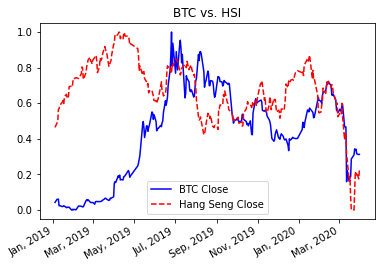

In [100]:
plt.plot(btc.index, btc_Norm, 'b-', label='BTC Close')
plt.plot(HangSeng.index, HangSeng_Norm, 'r--', label='Hang Seng Close')
plt.title("BTC vs. HSI")
plt.legend(loc='best')
plt.gcf().autofmt_xdate() #Rotar un poco las fechas para que quepan
date_format = mpl_dates.DateFormatter('%b, %Y')
plt.gca().xaxis.set_major_formatter(date_format) #Lo ponemos en formato "mes, año"
plt.show()

### Correlación del Bitcoin con el Nikkei 225 japonés


In [14]:
print('La volatilidad del Nikkei 225 es: ', np.std(Nikkei.Close))

La volatilidad del Nikkei 225 es:  1389.0056870979754


In [15]:
print('La correlación entre los precios de cierre del BTC y el Nikkei 225 es: ', np.corrcoef(btc.Close, Nikkei.Close)[1,0])
#El [1,0] es para que no me regrese la matriz varianza covarianza

La correlación entre los precios de cierre del BTC y el Nikkei 225 es:  0.21857289804072927


##### Correlación es positiva pero muy débil. No es suficientemente grande para asumir una relación lineal entre sus precios. 

In [80]:
Nikkei_Norm = normalizar(Nikkei['Close'])

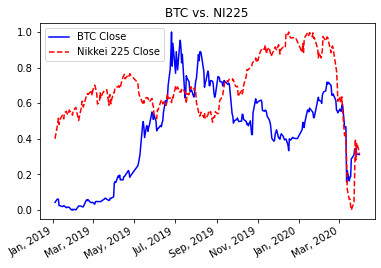

In [101]:
plt.plot(btc.index, btc_Norm, 'b-', label='BTC Close')
plt.plot(Nikkei.index, Nikkei_Norm, 'r--', label='Nikkei 225 Close')
plt.title("BTC vs. NI225")
plt.legend(loc='best')
plt.gcf().autofmt_xdate() #Rotar fechas
date_format = mpl_dates.DateFormatter('%b, %Y')
plt.gca().xaxis.set_major_formatter(date_format) #Formato "mes, año"
plt.show()

### Correlación del Bitcoin con EuroNext 100  

In [17]:
print('La volatilidad del EuroNext 100 es: ', np.std(EuroNext.Close))

La volatilidad del EuroNext 100 es:  80.79776813501636


In [18]:
print('La correlación de los precios de cierre entre el BTC y el EuroNext 100 es: ', np.corrcoef(btc.Close, EuroNext.Close)[1,0])

La correlación de los precios de cierre entre el BTC y el EuroNext 100 es:  0.45698186245608824


##### Correlación positiva. Podría existir una relación lineal entre los precios de cierre. 

In [82]:
EuroNext_Norm = normalizar(EuroNext['Close'])

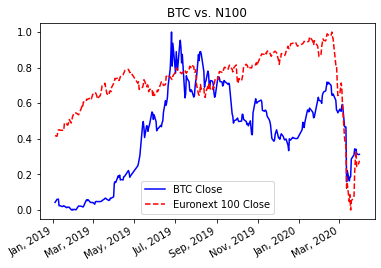

In [102]:
plt.plot(btc.index, btc_Norm, 'b-', label='BTC Close')
plt.plot(EuroNext.index, EuroNext_Norm, 'r--', label='Euronext 100 Close')
plt.title("BTC vs. N100")
plt.legend(loc='best')
plt.gcf().autofmt_xdate() #Rotar un poco las fechas para que quepan
date_format = mpl_dates.DateFormatter('%b, %Y')
plt.gca().xaxis.set_major_formatter(date_format) #Lo ponemos en formato "mes, año"
plt.show()

### Correlación del Bitcoin con el S&P 500

In [20]:
print('La volatilidad del S&P 500 es: ',np.std(SandP.Close))

La volatilidad del S&P 500 es:  208.26450708386633


In [21]:
print('La correlación en precios de cierre entre BTC y el S&P 500 es: ',np.corrcoef(btc.Close, SandP.Close)[1,0])

La correlación en precios de cierre entre BTC y el S&P 500 es:  0.5296778275116085


##### Correlación positiva. Podría haber una relación lineal entre los precios de cierre. 

In [84]:
SandP_Norm = normalizar(SandP['Close'])

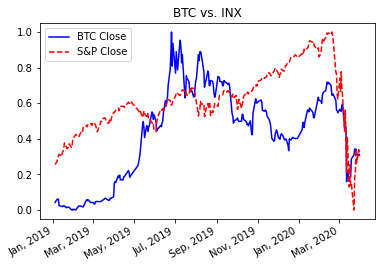

In [103]:
plt.plot(btc.index, btc_Norm, 'b-', label='BTC Close')
plt.plot(SandP.index, SandP_Norm, 'r--', label='S&P Close')
plt.title("BTC vs. INX")
plt.legend(loc='best')
plt.gcf().autofmt_xdate() #Rotar un poco las fechas para que quepan
date_format = mpl_dates.DateFormatter('%b, %Y')
plt.gca().xaxis.set_major_formatter(date_format) #Lo ponemos en formato "mes, año"
plt.show()




# Análisis de Litecoin

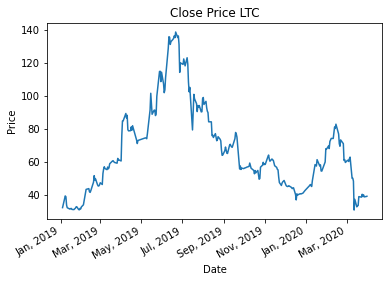

In [86]:
plt.plot(ltc["Close"]);
plt.title("Close Price LTC")
plt.xlabel("Date")
plt.ylabel("Price")
plt.gcf().autofmt_xdate() #Rotar un poco las fechas para que quepan
date_format = mpl_dates.DateFormatter('%b, %Y')
plt.gca().xaxis.set_major_formatter(date_format) #Lo ponemos en formato "mes, año"

In [87]:
print (np.max(ltc.Close)) #Precio Máximo Cierre
print (np.min(ltc.Close)) #Precio Mínimo Cierre
print (np.mean(ltc.Close)) #Media de los Precios de Cierre
print (np.std(ltc.Close)) #Volatilidad LTC

138.88
30.93
67.47352517985611
26.07458110228116


### Correlación del Litecoin con el índice Hang Seng de Hong Kong

In [88]:
np.std(HangSeng.Close) #Volatilidad del índice Hang Seng

1499.858866897196

In [89]:
np.corrcoef(ltc.Close, HangSeng.Close)[1,0] #Correlación de precios de cierre entre BTC con Hang Seng
#El [1,0] es para que no me lo regrese la matriz varianza, covarianza

0.29890428852012035

##### Correlación es positiva pero muy débil. No podemos asumir correlación lineal entre LTC y el Hang Seng

In [90]:
ltc_Norm = normalizar(ltc['Close'])

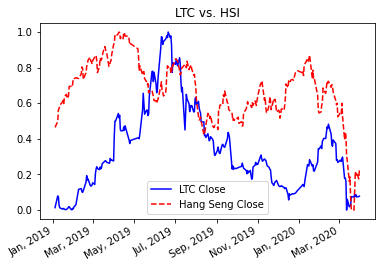

In [104]:
plt.plot(ltc.index, ltc_Norm, 'b-', label='LTC Close')
plt.plot(HangSeng.index, HangSeng_Norm, 'r--', label='Hang Seng Close')
plt.title("LTC vs. HSI")
plt.legend(loc='best')
plt.gcf().autofmt_xdate() #Rotar un poco las fechas para que quepan
date_format = mpl_dates.DateFormatter('%b, %Y')
plt.gca().xaxis.set_major_formatter(date_format) #Lo ponemos en formato "mes, año"
plt.show()

### Correlación del Litecoin con el Nikkei 225 japonés

In [59]:
np.std(Nikkei.Close) #Volatilidad del Nikkei 225 

1389.0056870979754

In [62]:
np.corrcoef(ltc.Close, Nikkei.Close)[1,0] #Correlación de precios de cierre entre BTC y Nikkei 225


-0.013242709836447063

##### Correlación negativa y muy cercana a 0. Tampoco nos sirve para predecir movimientos

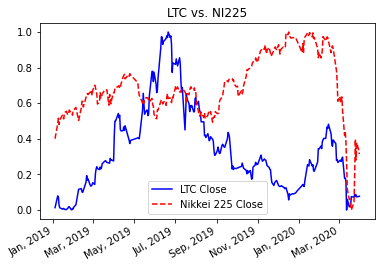

In [105]:
plt.plot(ltc.index, ltc_Norm, 'b-', label='LTC Close')
plt.plot(Nikkei.index, Nikkei_Norm, 'r--', label='Nikkei 225 Close')
plt.title("LTC vs. NI225")
plt.legend(loc='best')
plt.gcf().autofmt_xdate() #Rotar fechas
date_format = mpl_dates.DateFormatter('%b, %Y')
plt.gca().xaxis.set_major_formatter(date_format) #Formato "mes, año"
plt.show()

### Correlación del Litecoin con EuroNext 100  

In [69]:
np.std(EuroNext.Close) #Volatilidad del EuroNext 100

80.79776813501636

In [71]:
np.corrcoef(ltc.Close, EuroNext.Close)[1,0] #Correlación de precios de cierre entre BTC y Nikkei 225

0.25785227103202407

##### Correlación positiva pero muy débil. No podemos asumir nada acerca de su correlatividad

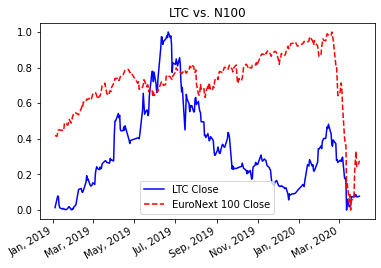

In [106]:
plt.plot(ltc.index, ltc_Norm, 'b-', label='LTC Close')
plt.plot(EuroNext.index, EuroNext_Norm, 'r--', label='EuroNext 100 Close')
plt.title("LTC vs. N100")
plt.legend(loc='best')
plt.gcf().autofmt_xdate() #Rotar fechas
date_format = mpl_dates.DateFormatter('%b, %Y')
plt.gca().xaxis.set_major_formatter(date_format) #Formato "mes, año"
plt.show()

### Correlación del Litecoin con el S&P 500

In [77]:
np.std(SandP.Close) #Volatilidad del S&P 500

208.26450708386633

In [79]:
np.corrcoef(ltc.Close, SandP.Close)[1,0] #Correlación entre LTC y S&P 500

0.14356856303970014

##### Correlación positiva pero muy débil. Tampoco podemos asumir nada

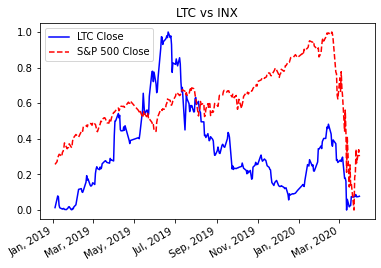

In [109]:
plt.plot(ltc.index, ltc_Norm, 'b-', label='LTC Close')
plt.plot(SandP.index, SandP_Norm, 'r--', label='S&P 500 Close')
plt.title("LTC vs INX")
plt.legend(loc='best')
plt.gcf().autofmt_xdate() #Rotar fechas
date_format = mpl_dates.DateFormatter('%b, %Y')
plt.gca().xaxis.set_major_formatter(date_format) #Formato "mes, año"
plt.show()

# Análisis de Ethereum 

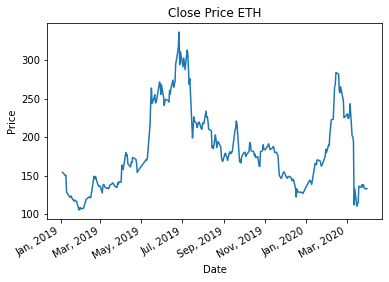

In [83]:
plt.plot(eth["Close"]);
plt.title("Close Price ETH")
plt.xlabel("Date")
plt.ylabel("Price")
plt.gcf().autofmt_xdate() #Rotar un poco las fechas para que quepan
date_format = mpl_dates.DateFormatter('%b, %Y')
plt.gca().xaxis.set_major_formatter(date_format) #Lo ponemos en formato "mes, año"

In [86]:
print (np.max(eth.Close)) #Precio Máximo Cierre
print (np.min(eth.Close)) #Precio Mínimo Cierre
print (np.mean(eth.Close)) #Media de los Precios de Cierre
print (np.std(eth.Close)) #Volatilidad LTC

336.75
105.6
183.76543165467626
50.39667413294845


### Correlación del Ethereum con el índice Hang Seng de Hong Kong

In [88]:
np.std(HangSeng.Close) #Volatilidad del Hang Seng

1499.858866897196

In [90]:
np.corrcoef(eth.Close, HangSeng.Close)[0,1]

0.09320419630441393

##### Correlación muy débil

In [95]:
eth_Norm = normalizar(eth['Close'])

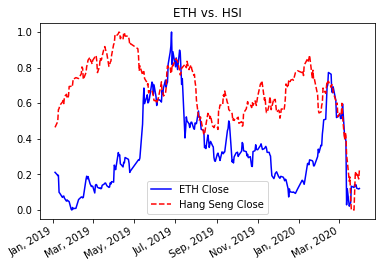

In [110]:
plt.plot(eth.index, eth_Norm, 'b-', label='ETH Close')
plt.plot(HangSeng.index, HangSeng_Norm, 'r--', label='Hang Seng Close')
plt.title("ETH vs. HSI")
plt.legend(loc='best')
plt.gcf().autofmt_xdate() #Rotar un poco las fechas para que quepan
date_format = mpl_dates.DateFormatter('%b, %Y')
plt.gca().xaxis.set_major_formatter(date_format) #Lo ponemos en formato "mes, año"
plt.show()

### Correlación del Litecoin con el Nikkei 225 japonés 

In [94]:
np.std(Nikkei.Close) #Volatilidad del Nikkei 

1389.0056870979754

In [98]:
np.corrcoef(eth.Close, Nikkei.Close)[0,1] #Correlación entre ETH y Nikkei

0.06525822215500694

##### Correlación muy débil

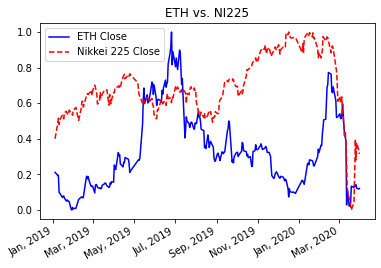

In [111]:
plt.plot(eth.index, eth_Norm, 'b-', label='ETH Close')
plt.plot(Nikkei.index, Nikkei_Norm, 'r--', label='Nikkei 225 Close')
plt.title("ETH vs. NI225")
plt.legend(loc='best')
plt.gcf().autofmt_xdate() #Rotar fechas
date_format = mpl_dates.DateFormatter('%b, %Y')
plt.gca().xaxis.set_major_formatter(date_format) #Formato "mes, año"
plt.show()

### Correlación del Ethereum con EuroNext 100  

In [103]:
np.std(EuroNext.Close) # Volatilidad del EuroNext 100

80.79776813501636

In [106]:
np.corrcoef(eth.Close, EuroNext.Close)[0,1] #Correlación entre ETH y EuroNext 100

0.3038951746644791

##### Correlación todavía muy baja para poder asegurar una relación lineal

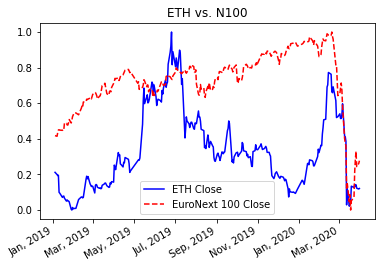

In [112]:
plt.plot(eth.index, eth_Norm, 'b-', label='ETH Close')
plt.plot(EuroNext.index, EuroNext_Norm, 'r--', label='EuroNext 100 Close')
plt.title("ETH vs. N100")
plt.legend(loc='best')
plt.gcf().autofmt_xdate() #Rotar fechas
date_format = mpl_dates.DateFormatter('%b, %Y')
plt.gca().xaxis.set_major_formatter(date_format) #Formato "mes, año"
plt.show()

### Correlación del Ethereum con el S&P 500

In [108]:
np.std(SandP.Close) #Volatilidad del S&P 500

208.26450708386633

In [110]:
np.corrcoef(eth.Close, SandP.Close)[0,1] #Correlación entre ETH y S&P 500

0.28572124817281364

##### Correlación positiva pero muy baja. Tampoco podemos asumir una relación 

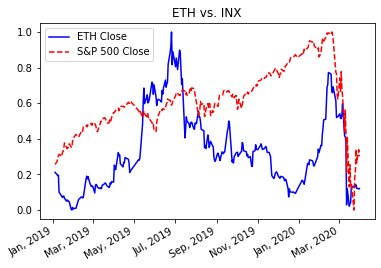

In [113]:
plt.plot(eth.index, eth_Norm, 'b-', label='ETH Close')
plt.plot(SandP.index, SandP_Norm, 'r--', label='S&P 500 Close')
plt.title("ETH vs. INX")
plt.legend(loc='best')
plt.gcf().autofmt_xdate() #Rotar fechas
date_format = mpl_dates.DateFormatter('%b, %Y')
plt.gca().xaxis.set_major_formatter(date_format) #Formato "mes, año"
plt.show()